.In this dataset we will be analysing and finding nutrition facts about the Mac
Donalds meals
.I will base thses on diffrent catagories like breakfast, coffee and tea ect..
.I will be doing some visualisations to give a graphical represantation of the 
data and findings 
. Will be also adding some columns and manipulating the data to get the best posible information in answering some key questions 


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
menu = pd.read_csv('menu.csv')

In [82]:
menu.tail()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Eggs,Egg_type,Chicken,Beverages
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,64,12,15,0,40,8,False,NaN,NaN,NaN
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,85,15,20,0,50,10,False,NaN,NaN,NaN
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,43,8,10,0,25,6,False,NaN,NaN,NaN
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,103,21,20,0,60,6,False,NaN,NaN,NaN
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,51,10,10,0,30,4,False,NaN,NaN,NaN


In [8]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
Category                         260 non-null object
Item                             260 non-null object
Serving Size                     260 non-null object
Calories                         260 non-null int64
Calories from Fat                260 non-null int64
Total Fat                        260 non-null float64
Total Fat (% Daily Value)        260 non-null int64
Saturated Fat                    260 non-null float64
Saturated Fat (% Daily Value)    260 non-null int64
Trans Fat                        260 non-null float64
Cholesterol                      260 non-null int64
Cholesterol (% Daily Value)      260 non-null int64
Sodium                           260 non-null int64
Sodium (% Daily Value)           260 non-null int64
Carbohydrates                    260 non-null int64
Carbohydrates (% Daily Value)    260 non-null int64
Dietary Fiber                    260 non-null int64
Di

In [9]:
# how many different categories are available
menu['Category'].nunique()

9

In [63]:
# the top 5 most catogory accurancies 
menu['Category'].value_counts()



Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

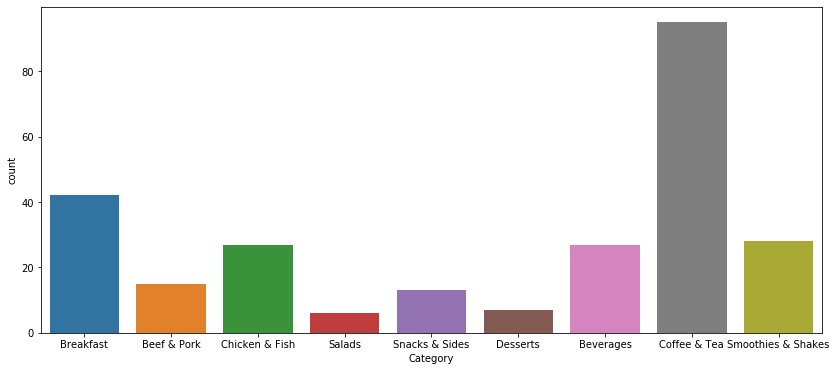

In [87]:
plt.figure(figsize = (14,6))
sns.countplot(x =menu['Category'], data= menu )
plt.savefig('categry.png')

In [11]:
# how many items are availale
menu['Item'].nunique()

260

In [12]:
# How many calories does the average MAC D meal contain
menu['Calories'].mean()

368.2692307692308

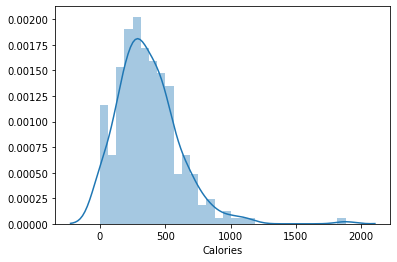

In [13]:

sns.distplot(menu['Calories'], bins = 30)

In [84]:
# what is the category with the most and least calories
menu.groupby('Category')['Calories'].max().sort_values(ascending = False)


Category
Chicken & Fish        1880
Breakfast             1150
Smoothies & Shakes     930
Coffee & Tea           760
Beef & Pork            750
Snacks & Sides         510
Salads                 450
Desserts               340
Beverages              280
Name: Calories, dtype: int64

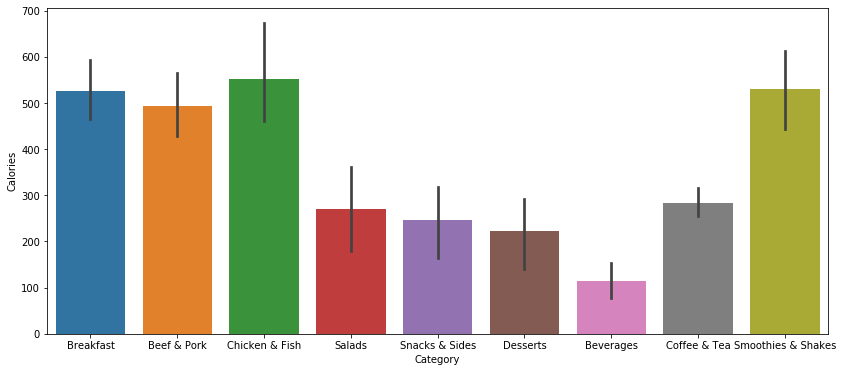

In [75]:
plt.figure(figsize = (14,6))
sns.barplot(x = menu['Category'], y = menu['Calories'], data = menu)

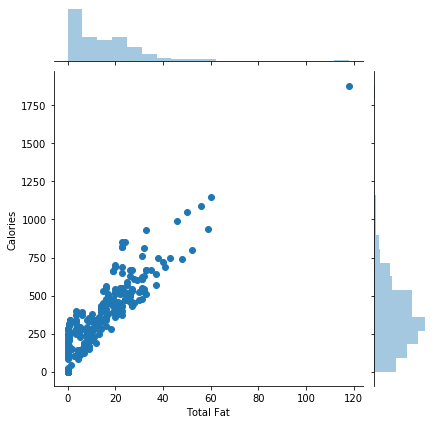

In [16]:
# a jointplot to visualise the Total Fat vs calories
sns.jointplot(x= menu['Total Fat'], y = menu['Calories'],data = menu,
             )

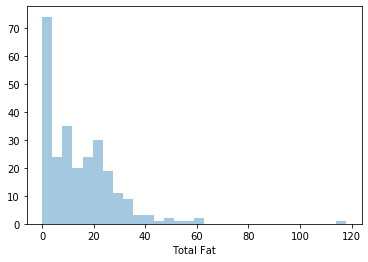

In [17]:
# visualising Total Fat 
sns.distplot(menu['Total Fat'], bins = 30, kde = False)

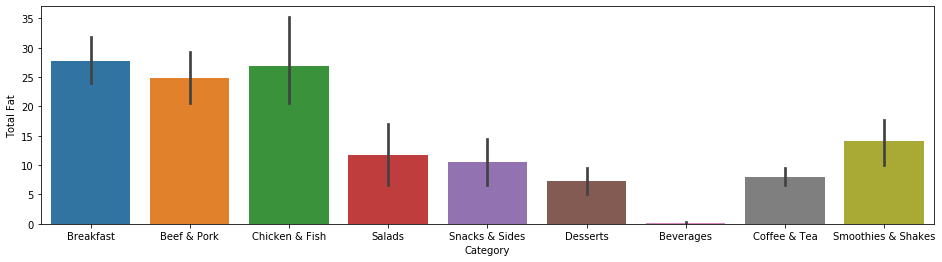

In [18]:
# visualising Total fat on all categories using a boxplot
plt.figure(figsize = (16,4))
sns.barplot(x =menu['Category'], y=menu['Total Fat'])

In [19]:
# i wanted to compare how much protien is in items that have eggs to those with no eggs
# i created this fuction to grab all items in the column [item] that has the string egg and separate 
# by True or false in a new column [Eggs]
def has_egg(title):
    if 'egg' in title.lower().split():
        return True
    else:
        return False

In [20]:
# fuction test
has_egg('my egg')

True

In [21]:
# create new column [Eggs] and apply has_egg fuction
menu['Eggs'] = menu['Item'].apply(has_egg)

In [22]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Eggs
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,True
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,True
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,False
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,True
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,True


In [23]:
# what is the average protein on foods that have eggs compared to those with no eggs
menu.groupby('Eggs')['Protein'].mean()

Eggs
False    12.319149
True     22.920000
Name: Protein, dtype: float64

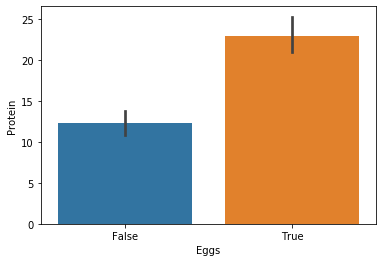

In [24]:
# visual of the average true vs false for protein
sns.barplot(x= 'Eggs' , y='Protein', data = menu)

In [25]:
def which_egg(egg):
    if 'egg white' in egg.lower():
        return 'whites'
    elif 'egg whites' in egg.lower():
        return 'whites'
    elif 'egg' in egg.lower():
        return 'whole'
    else:
        return np.nan
        
    

In [26]:
which_egg('delight')

nan

In [27]:
menu['Egg_type'] = menu['Item'].apply(which_egg)

In [28]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Eggs,Egg_type
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,4,17,3,17,10,0,25,15,True,whole
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,4,17,3,18,6,0,25,8,True,whites
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,4,17,2,14,8,0,25,10,False,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,4,17,2,21,15,0,30,15,True,whole
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,4,17,2,21,6,0,25,10,True,whites


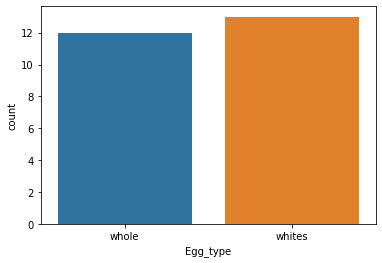

In [85]:
sns.countplot(x = menu['Egg_type'],data = menu)

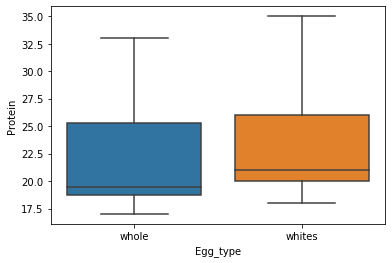

In [29]:
sns.boxplot(x = menu['Egg_type'], y= menu['Protein'], data = menu)

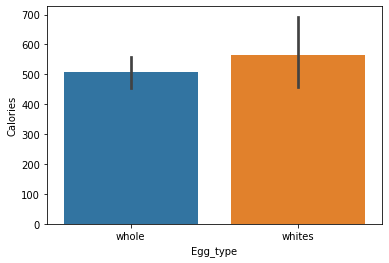

In [30]:
sns.barplot(x = menu['Egg_type'], y= menu['Calories'], data = menu)

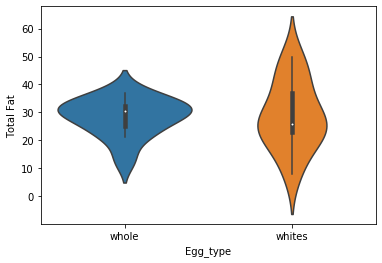

In [31]:
sns.violinplot(x = menu['Egg_type'], y= menu['Total Fat'], data = menu)

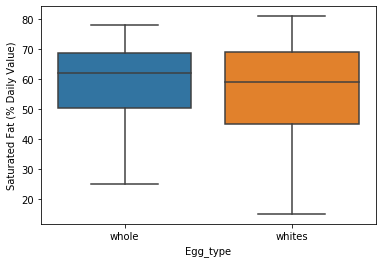

In [32]:
sns.boxplot(x = menu['Egg_type'], y= menu['Saturated Fat (% Daily Value)'], data = menu)

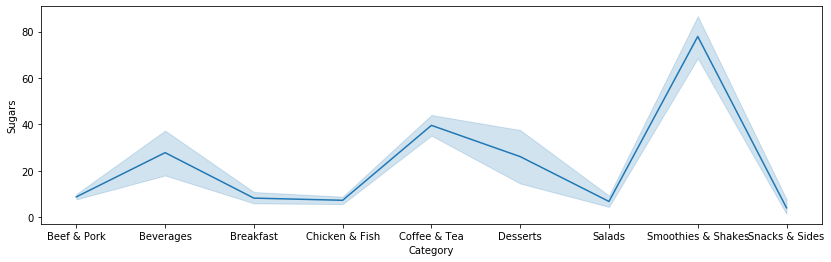

In [33]:
# lets check out the sugar levels of all Categories
plt.figure(figsize= (14,4))
sns.lineplot(x= menu['Category'], y= menu['Sugars'],
               data = menu)

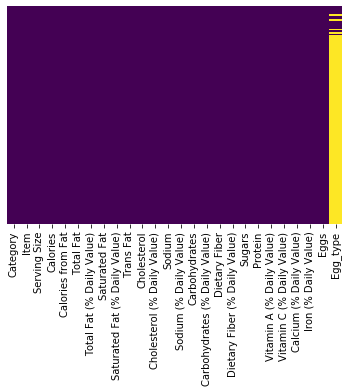

In [34]:
# checking if we have any null values or missing data
sns.heatmap(menu.isnull(), yticklabels=False, cbar = False, cmap= 'viridis')

In [35]:
# return trans fat in a series
menu['Trans Fat']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
255    0.5
256    1.0
257    0.0
258    1.0
259    0.0
Name: Trans Fat, Length: 260, dtype: float64

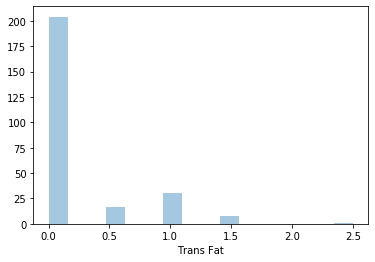

In [36]:
# a visual of Trans Fat
sns.distplot(menu['Trans Fat'], kde  = False)

In [37]:
# checking for Trans Fat in our categories
menu.groupby('Category')['Trans Fat'].count().sort_values(ascending = False)

Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Trans Fat, dtype: int64

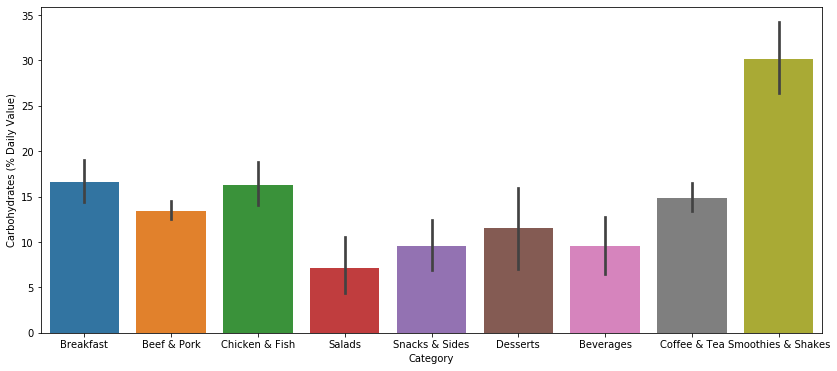

In [38]:
# a visual of Catergory vs Carbohydrates (% Daily Value
plt.figure(figsize =(14,6))
sns.barplot(x= 'Category', y= 'Carbohydrates (% Daily Value)', 
            data= menu )

In [39]:
def Chicken (title):
    if 'grilled chicken' in title.lower():
        return 'Grilled'
        
    elif 'crispy chicken' in title.lower():
                return 'Crispy'
    else:
        return np.nan
       
 
       

In [40]:
Chicken('my Crispy chiken')

nan

In [41]:
menu['Chicken'] = menu['Item'].apply(Chicken)

In [42]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Eggs,Egg_type,Chicken
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,17,3,17,10,0,25,15,True,whole,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,17,3,18,6,0,25,8,True,whites,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,17,2,14,8,0,25,10,False,NaN,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,17,2,21,15,0,30,15,True,whole,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,17,2,21,6,0,25,10,True,whites,NaN


In [43]:
menu.groupby('Chicken')['Protein'].mean().head()

Chicken
Crispy     24.928571
Grilled    28.615385
Name: Protein, dtype: float64

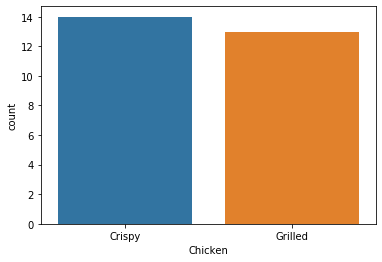

In [86]:
sns.countplot(x = menu['Chicken'], data= menu)

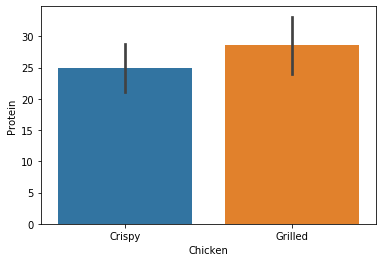

In [44]:
sns.barplot(x= menu['Chicken'], y = menu['Protein'], data = menu)

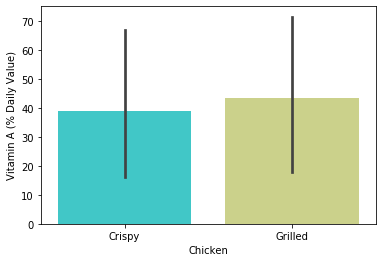

In [45]:
sns.barplot(x= menu['Chicken'], y = menu['Vitamin A (% Daily Value)'],
            data = menu, palette= 'rainbow')


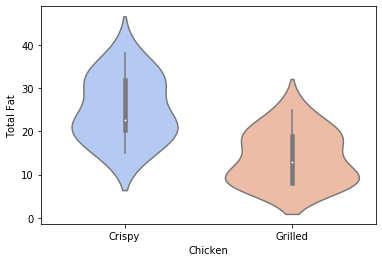

In [46]:
sns.violinplot(x= menu['Chicken'], y = menu['Total Fat'],
            data = menu, palette= 'coolwarm')

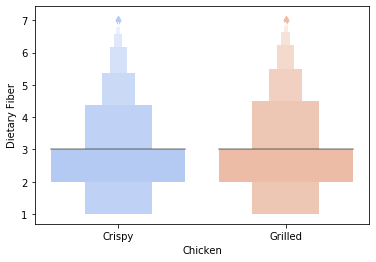

In [47]:
sns.boxenplot(x =  menu['Chicken'], y = menu['Dietary Fiber'],
            data = menu, palette= 'coolwarm')

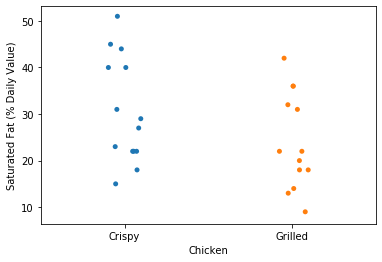

In [48]:
sns.stripplot(x =  menu['Chicken'], y = menu['Saturated Fat (% Daily Value)'],
            data = menu)

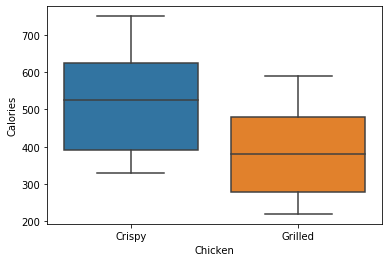

In [49]:
sns.boxplot(x =  menu['Chicken'], y = menu['Calories'],
            data = menu)

In [50]:
menu[menu['Category']== 'Beverages']

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Eggs,Egg_type,Chicken
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,0,39,0,0,0,0,0,False,NaN,NaN
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,...,0,55,0,0,0,0,0,False,NaN,NaN
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,...,0,76,0,0,0,0,0,False,NaN,NaN
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,...,0,28,0,0,0,0,0,False,NaN,NaN
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,False,NaN,NaN
115,Beverages,Diet Coke (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,False,NaN,NaN
116,Beverages,Diet Coke (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,False,NaN,NaN
117,Beverages,Diet Coke (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,False,NaN,NaN
118,Beverages,Dr Pepper (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,0,35,0,0,0,0,0,False,NaN,NaN
119,Beverages,Dr Pepper (Medium),21 fl oz cup,190,0,0.0,0,0.0,0,0.0,...,0,51,0,0,0,0,0,False,NaN,NaN


In [51]:
def beverages(drink):
    if 'coca-cola' in drink.lower().split():
        return 'coca_cola'
    elif 'dr pepper' in drink.lower():
        
        return 'Dr pepper' 
    elif 'sprite' in drink.lower():
        return 'sprite'
    elif 'juice' in drink.lower():
        return 'juice'
    else:
        return np.nan

In [62]:
beverages('my orange juice')

'juice'

In [53]:
menu['Beverages'] = menu['Item'].apply(beverages)

In [54]:
menu[menu['Category']== 'Beverages']

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Eggs,Egg_type,Chicken,Beverages
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,39,0,0,0,0,0,False,NaN,NaN,coca_cola
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,...,55,0,0,0,0,0,False,NaN,NaN,coca_cola
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,...,76,0,0,0,0,0,False,NaN,NaN,coca_cola
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,...,28,0,0,0,0,0,False,NaN,NaN,coca_cola
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,False,NaN,NaN,NaN
115,Beverages,Diet Coke (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,False,NaN,NaN,NaN
116,Beverages,Diet Coke (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,False,NaN,NaN,NaN
117,Beverages,Diet Coke (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,False,NaN,NaN,NaN
118,Beverages,Dr Pepper (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,35,0,0,0,0,0,False,NaN,NaN,Dr pepper
119,Beverages,Dr Pepper (Medium),21 fl oz cup,190,0,0.0,0,0.0,0,0.0,...,51,0,0,0,0,0,False,NaN,NaN,Dr pepper


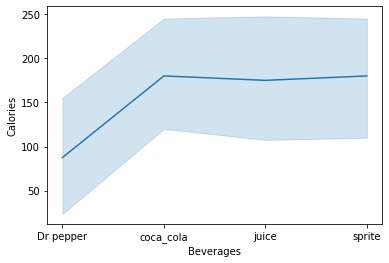

In [61]:
sns.lineplot( x = menu['Beverages'], y = menu['Calories'], data = menu)
plt.savefig('Bverages vs colories.png')

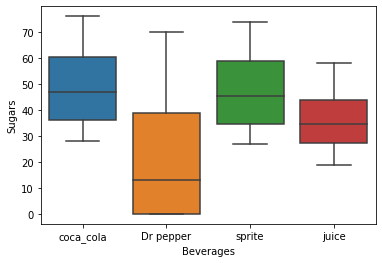

In [60]:
sns.boxplot(x = menu['Beverages'], y = menu['Sugars'], data = menu)
plt.savefig('')